In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

## NOTE
# If that didn't work , we can try using the local host URL 

{'status': {'timestamp': '2024-07-07T11:48:13.629Z', 'error_code': 0, 'error_message': None, 'elapsed': 41, 'credit_count': 1, 'notice': None, 'total_count': 10018}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11592, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows us to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
data

{'status': {'timestamp': '2024-07-07T11:48:13.629Z',
  'error_code': 0,
  'error_message': None,
  'elapsed': 41,
  'credit_count': 1,
  'notice': None,
  'total_count': 10018},
 'data': [{'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'slug': 'bitcoin',
   'num_market_pairs': 11592,
   'date_added': '2010-07-13T00:00:00.000Z',
   'tags': ['mineable',
    'pow',
    'sha-256',
    'store-of-value',
    'state-channel',
    'coinbase-ventures-portfolio',
    'three-arrows-capital-portfolio',
    'polychain-capital-portfolio',
    'binance-labs-portfolio',
    'blockchain-capital-portfolio',
    'boostvc-portfolio',
    'cms-holdings-portfolio',
    'dcg-portfolio',
    'dragonfly-capital-portfolio',
    'electric-capital-portfolio',
    'fabric-ventures-portfolio',
    'framework-ventures-portfolio',
    'galaxy-digital-portfolio',
    'huobi-capital-portfolio',
    'alameda-research-portfolio',
    'a16z-portfolio',
    '1confirmation-portfolio',
    'winklevoss-capital-portfoli

In [5]:
#This normalizes the data and makes it all pretty in a dataframe

pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-07-07T11:48:13.629Z,0,None,41,1,None,10018


In [6]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11592,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971962e+07,1.971962e+07,False,NaN,1,NaN,NaN,None,2024-07-07T11:47:00.000Z,57363.313459,2.070873e+10,-33.4408,-0.306561,1.167069,-6.692816,-19.828043,-7.953658,-20.648901,1.131183e+12,53.7832,1.204630e+12,None,2024-07-07T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 17:18:14.920311
1,1027,Ethereum,ETH,ethereum,9122,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202008e+08,1.202008e+08,True,NaN,2,NaN,NaN,None,2024-07-07T11:46:00.000Z,3010.614533,1.040183e+10,-33.9974,-0.003159,0.205101,-11.064557,-21.325910,0.602655,-16.956138,3.618781e+11,17.1855,3.618781e+11,None,2024-07-07T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 17:18:14.920311
2,825,Tether USDt,USDT,tether,91099,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.122238e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-07T11:46:00.000Z,0.999865,4.229502e+10,-28.5175,-0.025576,-0.019296,0.182114,0.058070,-0.053357,0.016332,1.122086e+11,5.3288,1.160611e+11,None,2024-07-07T11:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-07 17:18:14.920311
3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475827e+08,1.475827e+08,False,NaN,4,NaN,NaN,None,2024-07-07T11:46:00.000Z,507.636557,1.650808e+09,-4.7229,-0.309760,-0.851071,-11.600052,-27.836416,-13.196547,-14.749067,7.491839e+10,3.5621,7.491839e+10,None,2024-07-07T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 17:18:14.920311
4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.635481e+08,5.796868e+08,True,NaN,5,NaN,NaN,None,2024-07-07T11:46:00.000Z,139.399434,1.861382e+09,-33.6880,-0.068738,0.428743,-1.164150,-18.843351,-4.252583,-23.474341,6.461834e+10,3.0687,8.080801e+10,None,2024-07-07T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 17:18:14.920311
5,3408,USDC,USDC,usd-coin,20851,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.375395e+10,3.375395e+10,False,NaN,6,NaN,NaN,None,2024-07-07T11:46:00.000Z,0.999954,3.526445e+09,-38.8577,-0.013554,0.003023,0.007376,0.004579,-0.036474,-0.013347,3.375239e+10,1.6029,3.375239e+10,None,2024-07-07T11:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-07 17:18:14.920311
6,52,XRP,XRP,xrp,1351,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.572306e+10,9.998747e+10,False,NaN,7,NaN,NaN,None,2024-07-07T11:47:00.000Z,0.433764,7.141128e+08,-23.6922,-0.380268,-0.196861,-8.111851,-17.657869,-16.722295,-28.524377,2.417066e+10,1.1492,4.337641e+10,None,2024-07-07T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 17:18:14.920311
7,11419,Toncoin,TON,toncoin,451,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.506067e+09,5.108652e+09,True,NaN,8,3.414167e+09,2.582679e+10,None,2024-07-07T11:46:00.000Z,7.564597,2.792790e+08,-41.9312,-0.434829,0.208176,-1.172620,0.802628,32.593553,30.301313,1.895739e+10,0.9003,3.864490e+10,None,2024-07-07T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 17:18:14.920311
8,74,Dogecoin,DOGE,dogecoin,1021,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, me

In [7]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    # Use this if wejust want to keep it in a dataframe , instead of csv also
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2])

    if not os.path.isfile(r'API.csv'):
        df.to_csv(r'API.csv', header='column_names')
    else:
        df.to_csv(r'API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'API.csv')

# If that didn't work , we can try using the local host URL


In [8]:
import os 
from time import time
from time import sleep

for i in range(333):  ## 33 is max limit of generating free API keys from website : https://pro.coinmarketcap.com/
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11592,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19719621.00000,19719621.00000,False,NaN,1,NaN,NaN,None,2024-07-07T11:47:00.000Z,57363.31346,20708726585.37028,-33.44080,-0.30656,1.16707,-6.69282,-19.82804,-7.95366,-20.64890,1131182800706.37817,53.78320,1204629582629.10010,None,2024-07-07T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 17:18:14.920311
1,1027,Ethereum,ETH,ethereum,9122,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120200756.88517,120200756.88517,True,NaN,2,NaN,NaN,None,2024-07-07T11:46:00.000Z,3010.61453,10401825647.75322,-33.99740,-0.00316,0.20510,-11.06456,-21.32591,0.60266,-16.95614,361878145547.19641,17.18550,361878145547.20001,None,2024-07-07T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 17:18:14.920311
2,825,Tether USDt,USDT,tether,91099,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112223789756.27960,116076856617.27618,True,NaN,3,NaN,NaN,None,2024-07-07T11:46:00.000Z,0.99986,42295024301.36388,-28.51750,-0.02558,-0.01930,0.18211,0.05807,-0.05336,0.01633,112208599068.34683,5.32880,116061144375.61000,None,2024-07-07T11:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-07 17:18:14.920311
3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582730.09550,147582730.09550,False,NaN,4,NaN,NaN,None,2024-07-07T11:46:00.000Z,507.63656,1650807570.62669,-4.72290,-0.30976,-0.85107,-11.60005,-27.83642,-13.19655,-14.74907,74918388994.71269,3.56210,74918388994.71001,None,2024-07-07T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 17:18:14.920311
4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,463548112.75258,579686812.29626,True,NaN,5,NaN,NaN,None,2024-07-07T11:46:00.000Z,139.39943,1861381922.77372,-33.68800,-0.06874,0.42874,-1.16415,-18.84335,-4.25258,-23.47434,64618344617.54965,3.06870,80808013616.49001,None,2024-07-07T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 17:18:14.920311
5,3408,USDC,USDC,usd-coin,20851,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33753949932.45548,33753949932.45548,False,NaN,6,NaN,NaN,None,2024-07-07T11:46:00.000Z,0.99995,3526444657.04118,-38.85770,-0.01355,0.00302,0.00738,0.00458,-0.03647,-0.01335,33752394995.93702,1.60290,33752394995.94000,None,2024-07-07T11:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-07 17:18:14.920311
6,52,XRP,XRP,xrp,1351,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55723063839.00000,99987471767.00000,False,NaN,7,NaN,NaN,None,2024-07-07T11:47:00.000Z,0.43376,714112806.91958,-23.69220,-0.38027,-0.19686,-8.11185,-17.65787,-16.72230,-28.52438,24170662675.60896,1.14920,43376406483.04000,None,2024-07-07T11:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-07 17:18:14.920311
7,11419,Toncoin,TON,toncoin,451,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2506067323.65463,5108652389.74175,True,NaN,8,3414166606.00000,25826794846.90679,None,2024-07-07T11:46:00.000Z,7.56460,279278998.96423,-41.93120,-0.43483,0.20818,-1.17262,0.80263,32.59355,30.30131,18957389638.46130,0.90030,38644897112.

In [11]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.28587,1.19234,-6.66681,-19.81180,-7.99881,-20.59241
Ethereum,-0.00066,0.19771,-11.07032,-21.37146,0.50875,-16.91422
Tether USDt,-0.01317,-0.02127,0.18175,0.05016,-0.02465,0.01643
BNB,-0.24711,-0.84602,-11.59928,-27.84219,-13.20808,-14.70967
Solana,-0.02658,0.45833,-1.16201,-18.84718,-4.29221,-23.46716
USDC,-0.00178,0.00430,0.00503,-0.00019,-0.01376,-0.00519
XRP,-0.33483,-0.20168,-8.09420,-17.68095,-16.72994,-28.47889
Toncoin,-0.44993,0.21494,-1.20084,0.80780,32.57873,30.51642
Dogecoin,-0.30295,0.76475,-10.01764,-31.62825,-25.42704,-46.74421


In [12]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.28587
             quote.USD.percent_change_24h     1.19234
             quote.USD.percent_change_7d     -6.66681
             quote.USD.percent_change_30d   -19.81180
             quote.USD.percent_change_60d    -7.99881
             quote.USD.percent_change_90d   -20.59241
Ethereum     quote.USD.percent_change_1h     -0.00066
             quote.USD.percent_change_24h     0.19771
             quote.USD.percent_change_7d    -11.07032
             quote.USD.percent_change_30d   -21.37146
             quote.USD.percent_change_60d     0.50875
             quote.USD.percent_change_90d   -16.91422
Tether USDt  quote.USD.percent_change_1h     -0.01317
             quote.USD.percent_change_24h    -0.02127
             quote.USD.percent_change_7d      0.18175
             quote.USD.percent_change_30d     0.05016
             quote.USD.percent_change_60d    -0.02465
             quote.USD.percent_change_90

In [13]:
type(df3)

pandas.core.frame.DataFrame

In [14]:
type(df4)

pandas.core.series.Series

In [15]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.28587
            quote.USD.percent_change_24h   1.19234
            quote.USD.percent_change_7d   -6.66681
            quote.USD.percent_change_30d -19.81180
            quote.USD.percent_change_60d  -7.99881
            quote.USD.percent_change_90d -20.59241
Ethereum    quote.USD.percent_change_1h   -0.00066
            quote.USD.percent_change_24h   0.19771
            quote.USD.percent_change_7d  -11.07032
            quote.USD.percent_change_30d -21.37146
            quote.USD.percent_change_60d   0.50875
            quote.USD.percent_change_90d -16.91422
Tether USDt quote.USD.percent_change_1h   -0.01317
            quote.USD.percent_change_24h  -0.02127
            quote.USD.percent_change_7d    0.18175
            quote.USD.percent_change_30d   0.05016
            quote.USD.percent_change_60d  -0.02465
            quote.USD.percent_change_90d   0.01643
BNB         quote.USD.percent_change_1h   -0.24711
            quote.USD.percent_change_24h  -0.84602
            quote.USD.percent_change_7d  -11.59928
            quote.USD.percent_change_30d -27.84219
            quote.USD.percent_change_60d -13.20808
            quote.USD.percent_change_90d -14.70967
Solana      quote.USD.percent_change_1h   -0.02658
            quote.USD.percent_change_24h   0.45833
            quote.USD.percent_change_7d   -1.16201
            quote.USD.percent_change_30d -18.84718
            quote.USD.percent_change_60d  -4.29221
            quote.USD.percent_change_90d -23.46716
USDC        quote.USD.percent_change_1h   -0.00178
            quote.USD.percent_change_24h   0.00430
            quote.USD.percent_change_7d    0.00503
            quote.USD.percent_change_30d  -0.00019
            quote.USD.percent_change_60d  -0.01376
            quote.USD.percent_change_90d  -0.00519
XRP         quote.USD.percent_change_1h   -0.33483
            quote.USD.percent_change_24h  -0.20168
            quote.USD.percent_change_7d   -8.09420
            quote.USD.percent_change_30d -17.68095
            quote.USD.percent_change_60d -16.72994
            quote.USD.percent_change_90d -28.47889
Toncoin     quote.USD.percent_change_1h   -0.44993
            quote.USD.percent_change_24h   0.21494
            quote.USD.percent_change_7d   -1.20084
            quote.USD.percent_change_30d   0.80780
            quote.USD.percent_change_60d  32.57873
            quote.USD.percent_change_90d  30.51642
Dogecoin    quote.USD.percent_change_1h   -0.30295
            quote.USD.percent_change_24h   0.76475
            quote.USD.percent_change_7d  -10.01764
            quote.USD.percent_change_30d -31.62825
            quote.USD.percent_change_60d -25.42704
            quote.USD.percent_change_90d -46.74421
Cardano     quote.USD.percent_change_1h   -0.11580
            quote.USD.percent_change_24h   2.44806
            quote.USD.percent_change_7d   -5.02064
            quote.USD.percent_change_30d -24.56522
            quote.USD.percent_change_60d -17.07791
            quote.USD.percent_change_90d -39.93107
TRON        quote.USD.percent_change_1h   -0.35512
            quote.USD.percent_change_24h   0.08768
            quote.USD.percent_change_7d    3.42709
            quote.USD.percent_change_30d  13.00510
            quote.USD.percent_change_60d   5.43443
            quote.USD.percent_change_90d   5.21991
Avalanche   quote.USD.percent_change_1h   -0.88046
            quote.USD.percent_change_24h   2.33078
            quote.USD.percent_change_7d   -7.21597
            quote.USD.percent_change_30d -27.36621
            quote.USD.percent_change_60d -23.64962
            quote.USD.percent_change_90d -47.69338
Shiba Inu   quote.USD.percent_change_1h   -0.00864
            quote.USD.percent_change_24h   2.79094
            quote.USD.percent_change_7d   -4.14173
            quote.USD.percent_change_30d -35.76224
            quote.USD.percent_change_60d -28.31126
            quo

In [17]:
type(df5)

pandas.core.frame.DataFrame

In [19]:

#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. 


index = pd.Index(range(df5.shape[0]))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If df6 only has the index and values try doing reset_index like "df5.reset_index()"

,values
0,-0.28587
1,1.19234
2,-6.66681
3,-19.81180
4,-7.99881
5,-20.59241
6,-0.00066
7,0.19771
8,-11.07032
9,-21.37146


In [20]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.28587
1,Bitcoin,quote.USD.percent_change_24h,1.19234
2,Bitcoin,quote.USD.percent_change_7d,-6.66681
3,Bitcoin,quote.USD.percent_change_30d,-19.81180
4,Bitcoin,quote.USD.percent_change_60d,-7.99881
5,Bitcoin,quote.USD.percent_change_90d,-20.59241
6,Ethereum,quote.USD.percent_change_1h,-0.00066
7,Ethereum,quote.USD.percent_change_24h,0.19771
8,Ethereum,quote.USD.percent_change_7d,-11.07032
9,Ethereum,quote.USD.percent_change_30d,-21.37146


In [21]:
# Changing the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.28587
1,Bitcoin,quote.USD.percent_change_24h,1.19234
2,Bitcoin,quote.USD.percent_change_7d,-6.66681
3,Bitcoin,quote.USD.percent_change_30d,-19.81180
4,Bitcoin,quote.USD.percent_change_60d,-7.99881
5,Bitcoin,quote.USD.percent_change_90d,-20.59241
6,Ethereum,quote.USD.percent_change_1h,-0.00066
7,Ethereum,quote.USD.percent_change_24h,0.19771
8,Ethereum,quote.USD.percent_change_7d,-11.07032
9,Ethereum,quote.USD.percent_change_30d,-21.37146


In [23]:
# renaming column values 

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.28587
1,Bitcoin,24h,1.19234
2,Bitcoin,7d,-6.66681
3,Bitcoin,30d,-19.81180
4,Bitcoin,60d,-7.99881
5,Bitcoin,90d,-20.59241
6,Ethereum,1h,-0.00066
7,Ethereum,24h,0.19771
8,Ethereum,7d,-11.07032
9,Ethereum,30d,-21.37146


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/nitinspatel/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


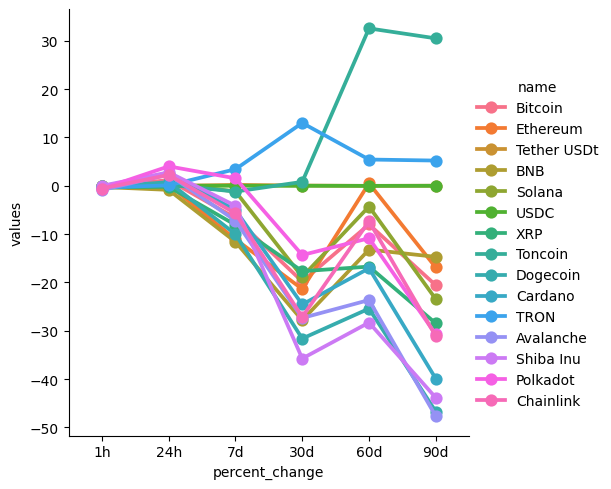

In [24]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [25]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,57363.31346,2024-07-07 17:18:14.920311
0,Bitcoin,57363.31346,2024-07-07 17:18:18.118956
0,Bitcoin,57371.84836,2024-07-07 17:19:18.603648
0,Bitcoin,57372.60706,2024-07-07 17:20:19.564282
0,Bitcoin,57368.66905,2024-07-07 17:21:21.002550
0,Bitcoin,57418.31776,2024-07-07 17:22:21.553237


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

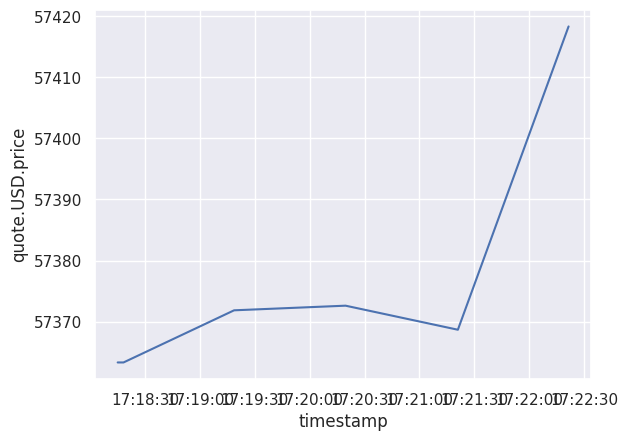

In [26]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)